In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import cv2 as cv
import os, sys

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
# Define the paths to training and testing directories for each class
train_dirs = {
    'Class1': '/drive/MyDrive/MRI Classification.v3i.folder/train/Benign',
    'Class2': '/drive/MyDrive/MRI Classification.v3i.folder/train/Glioma',
    'Class3': '/drive/MyDrive/MRI Classification.v3i.folder/train/Malignancy',
    'Class4': '/drive/MyDrive/MRI Classification.v3i.folder/train/Meningioma',
    'Class5': '/drive/MyDrive/MRI Classification.v3i.folder/train/No Tumor',
    'Class6': '/drive/MyDrive/MRI Classification.v3i.folder/train/Pituitary',
    'Class7': '/drive/MyDrive/MRI Classification.v3i.folder/train/adenocarcinoma',
    'Class8': '/drive/MyDrive/MRI Classification.v3i.folder/train/large-cell-carcinoma',
    'Class9': '/drive/MyDrive/MRI Classification.v3i.folder/train/normal',
    'Class10': '/drive/MyDrive/MRI Classification.v3i.folder/train/squamous-cell-carcinoma',
    # Add paths for other classes
}

test_dirs = {
    'Class1': '/drive/MyDrive/MRI Classification.v3i.folder/test/Benign',
    'Class2': '/drive/MyDrive/MRI Classification.v3i.folder/test/Glioma',
    'Class3': '/drive/MyDrive/MRI Classification.v3i.folder/test/Malignancy',
    'Class4': '/drive/MyDrive/MRI Classification.v3i.folder/test/Meningioma',
    'Class5': '/drive/MyDrive/MRI Classification.v3i.folder/test/No Tumor',
    'Class6': '/drive/MyDrive/MRI Classification.v3i.folder/test/Pituitary',
    'Class7': '/drive/MyDrive/MRI Classification.v3i.folder/test/adenocarcinoma',
    'Class8': '/drive/MyDrive/MRI Classification.v3i.folder/test/large-cell-carcinoma',
    'Class9': '/drive/MyDrive/MRI Classification.v3i.folder/test/normal',
    'Class10': '/drive/MyDrive/MRI Classification.v3i.folder/test/squamous-cell-carcinoma',
    # Add paths for other classes
}
valid_dirs = {
    'Class1': '/drive/MyDrive/MRI Classification.v3i.folder/valid/Benign',
    'Class2': '/drive/MyDrive/MRI Classification.v3i.folder/valid/Glioma',
    'Class3': '/drive/MyDrive/MRI Classification.v3i.folder/valid/Malignancy',
    'Class4': '/drive/MyDrive/MRI Classification.v3i.folder/valid/Meningioma',
    'Class5': '/drive/MyDrive/MRI Classification.v3i.folder/valid/No Tumor',
    'Class6': '/drive/MyDrive/MRI Classification.v3i.folder/valid/Pituitary',
    'Class7': '/drive/MyDrive/MRI Classification.v3i.folder/valid/adenocarcinoma',
    'Class8': '/drive/MyDrive/MRI Classification.v3i.folder/valid/large-cell-carcinoma',
    'Class9': '/drive/MyDrive/MRI Classification.v3i.folder/valid/normal',
    'Class10': '/drive/MyDrive/MRI Classification.v3i.folder/valid/squamous-cell-carcinoma',
    # Add paths for other classes
}

In [ ]:

def load_images_from_directory(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv.imread(img_path)
            if img is None:
                print(f"Warning: Unable to read image {img_path}")
                continue
            img_gs = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
            img_gs = cv.resize(img_gs, (100, 100))
            img_gs = img_gs / 255.0  # Normalize to [0, 1]
            img_gs = img_gs.reshape(100, 100, 1)
            images.append(img_gs)
            labels.append(label)
    return images, labels

def load_dataset(class_dirs):
    data = []
    labels = []
    for label, directory in class_dirs.items():
        class_images, class_labels = load_images_from_directory(directory, label)
        data.extend(class_images)
        labels.extend(class_labels)
    return np.array(data, dtype=np.float32), np.array(labels)

# Load training data
train_images, train_labels = load_dataset(train_dirs)

# Load testing data
test_images, test_labels = load_dataset(test_dirs)

valid_images, valid_labels = load_dataset(valid_dirs)

# Convert labels to categorical values (one-hot encoding)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
valid_labels_encoded = label_encoder.transform(valid_labels)

train_labels_onehot = to_categorical(train_labels_encoded)
test_labels_onehot = to_categorical(test_labels_encoded)
valid_labels_onehot = to_categorical(valid_labels_encoded)

# Now train_images, test_images, train_labels_onehot, and test_labels_onehot are ready for model training


In [ ]:
from tensorflow.keras import models, layers
num_classes = 10
network = models.Sequential()

# First Convolutional Block
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 1)))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Dropout(0.25))

# Second Convolutional Block
network.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Dropout(0.25))

# Third Convolutional Block
network.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Dropout(0.25))

# Fourth Convolutional Block
network.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Dropout(0.25))

# Fully Connected Layers
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
test_labels

array(['Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
       'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2',
       'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Clas

In [ ]:
trained_network = network.fit(train_images, train_labels_onehot,
                    epochs=200,  # You can adjust the number of epochs
                    batch_size=32,  # You can adjust the batch size
                    validation_data=(valid_images, valid_labels_onehot))

Epoch 1/200
162/162 [==============================] - 10s 63ms/step - loss: 0.6150 - accuracy: 0.7386 - val_loss: 0.9399 - val_accuracy: 0.7206
Epoch 2/200
162/162 [==============================] - 10s 61ms/step - loss: 0.5820 - accuracy: 0.7431 - val_loss: 0.3881 - val_accuracy: 0.8654
Epoch 3/200
162/162 [==============================] - 10s 59ms/step - loss: 0.5110 - accuracy: 0.7738 - val_loss: 0.4298 - val_accuracy: 0.8320
Epoch 4/200
162/162 [==============================] - 10s 60ms/step - loss: 0.4217 - accuracy: 0.8067 - val_loss: 0.4065 - val_accuracy: 0.8431
Epoch 5/200
162/162 [==============================] - 10s 60ms/step - loss: 0.3983 - accuracy: 0.8136 - val_loss: 0.5255 - val_accuracy: 0.8289
Epoch 6/200
162/162 [==============================] - 10s 61ms/step - loss: 0.3859 - accuracy: 0.8222 - val_loss: 0.3319 - val_accuracy: 0.8684
Epoch 7/200
162/162 [==============================] - 10s 62ms/step - loss: 0.3599 - accuracy: 0.8303 - val_loss: 0.3771 - val_ac

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print(f'Test accuracy: {test_acc}')


18/18 [==============================] - 1s 38ms/step - loss: 0.6003 - accuracy: 0.8947
Test accuracy: 0.8947368264198303


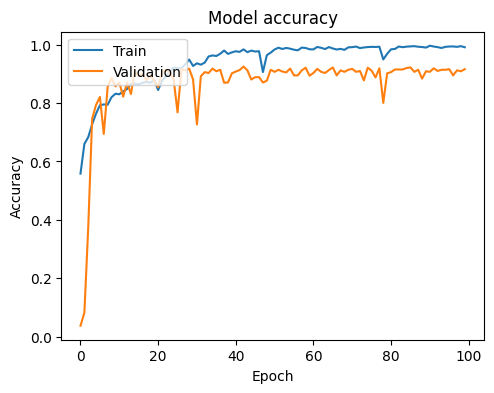

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trained_network.history['accuracy'])
plt.plot(trained_network.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


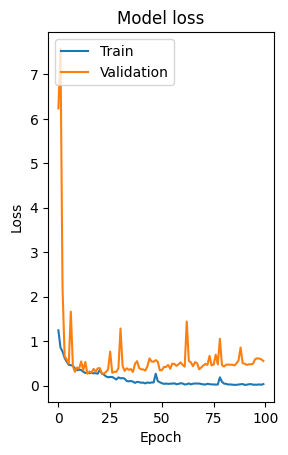

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(trained_network.history['loss'])
plt.plot(trained_network.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:

print("Test Accuracy:", test_acc)

Test Accuracy: 0.8947368264198303


In [ ]:
model.save("mrimodel.h5")

NameError: name 'model' is not defined

In [ ]:
network.save("mrimodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = models.load_model("mrimodel.h5")

In [ ]:
input_image = cv.imread("/drive/MyDrive/MRI Classification.v3i.folder/test/Glioma/Tr-gl_0016_jpg.rf.5de001926caf2ae42b41b810c4c53014.jpg")
input_image_gs = cv.cvtColor(input_image, cv.COLOR_RGB2GRAY)
input_image_gs = cv.resize(input_image_gs, (100, 100))
input_image_gs = input_image_gs / 255
input_image_gs = input_image_gs.reshape(1, 100, 100, 1)  # Reshape for model input

In [ ]:
prediction = loaded_model.predict(input_image_gs)
predicted_class = np.argmax(prediction)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 1s 801ms/step
Predicted Class: 4
